## Project - Ford Go Bike 2017 Data Exploration
### By Somya Bharti

**This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will be performing analysing and visualization for answering relevant questions.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Preliminary Wrangling

### Gather:

In [5]:
df=pd.read_csv('C:/Users/somya/Desktop/comm_data/2017-fordgobike-tripdata.csv')

### Assess:

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [7]:
df.shape

(519700, 13)

In [8]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

- There are no missing values in the dataset.
- Datatype of start_time, end_time are String but it should be DateTime.
- We need to analyze bike_id, user_type, so it should be a categorical variable.

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


- Finding the missing values in Dataset.

Text(0.5, 1.0, 'Number of missing values in the features.')

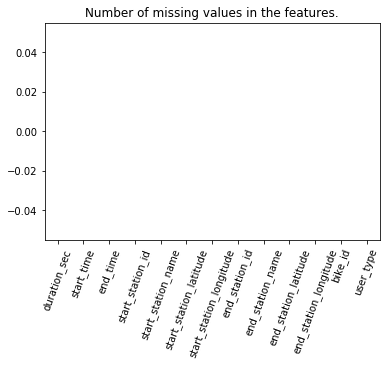

In [10]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=70);
plt.title('Number of missing values in the features.')

- There are no missing values in the dataset.

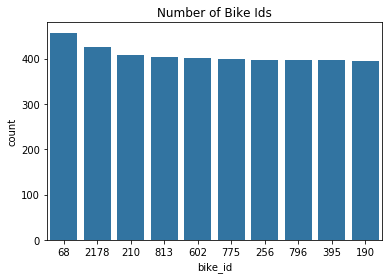

In [12]:
base_color = sb.color_palette()[0]
id = df['bike_id'].value_counts().head(10).index
sb.countplot(data = df, x = 'bike_id', color = base_color, order = id)
plt.title('Number of Bike Ids');

- We observed the top 10 bike ids which people hire.

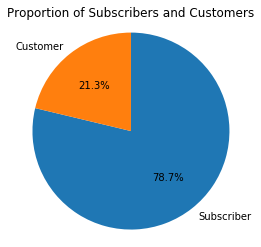

In [13]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('Proportion of Subscribers and Customers');

- There are 78.7% subscribers and 21.4% customers.

In [10]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

Text(0.5, 1.0, 'Location of end stations.')

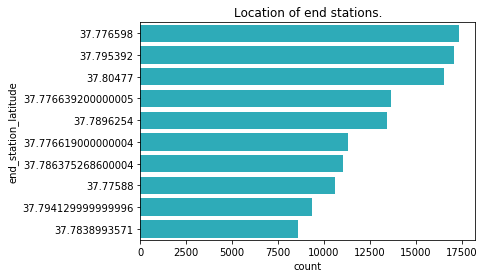

In [15]:
base_color = sb.color_palette()[9]
end_station_latitude = df['end_station_latitude'].value_counts().head(10).index
sb.countplot(data = df, y = 'end_station_latitude', color = base_color, order = end_station_latitude)
plt.title('Location of end stations.')

- Almost all the end stations are located around 37 degree latitude.

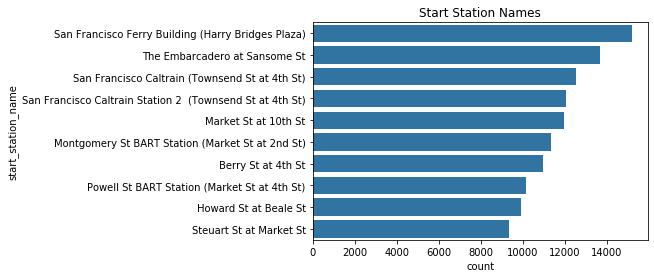

In [16]:

base_color = sb.color_palette()[0]
start_station_name = df['start_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = start_station_name)
plt.title('Start Station Names');

- Most of the people start trips from San Francisco.

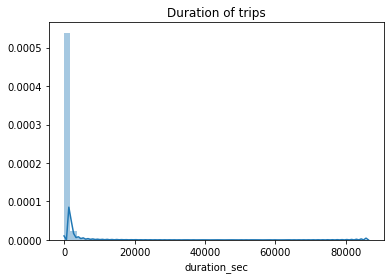

In [17]:
sb.distplot(df['duration_sec'])
plt.title('Duration of trips');

- This feature is vaguely distributed.

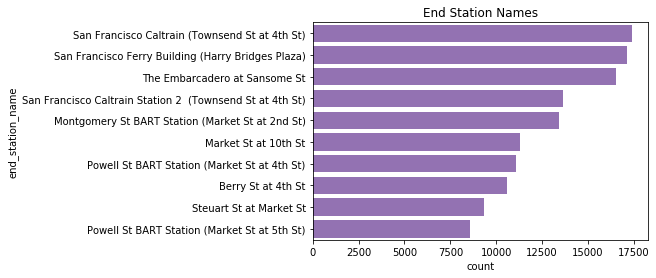

In [18]:

base_color = sb.color_palette()[4]
end_station_name = df['end_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = end_station_name)
plt.title('End Station Names');

- People end their trips at San Francisco as well.

### Clean:

- Make a copy of the original dataset.

In [20]:
df_new=df.copy()

**Define**

- Convert the datatypes of 'start_time' and 'end_time' to correct format.

**Code**

In [21]:
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

**Test**

In [22]:
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

**Define**
- Convert the columns to categorical variables for further visualization.

**Code**

In [23]:
df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')
df_new['user_type'] = df_new['user_type'].astype('category')

**Test**

In [24]:
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
dtype: object

**Define**
- Extract Date, week, start hour and month of the trip from Start_time and end_time.
- Convert the duration in seconds to minutes for proper analysis.

**Code**

In [25]:
import datetime as dt
df_new['start_date'] = df_new['start_time'].dt.date
df_new['end_date'] = df_new['end_time'].dt.date

In [26]:
df_new['start_hour'] = df_new['start_time'].dt.hour
df_new['end_hour'] = df_new['end_time'].dt.hour

In [27]:
df_new['start_week'] = df_new['start_time'].dt.weekday_name.str.slice(stop=3)
df_new['end_week'] = df_new['end_time'].dt.weekday_name.str.slice(stop=3)

In [28]:
df_new['start_month'] = df_new['start_time'].dt.month_name().str.slice(stop=3)
df_new['end_month'] = df_new['end_time'].dt.month_name().str.slice(stop=3)

In [29]:


df_new['duration_min']=df_new['duration_sec']/60

**Test**

In [30]:
df_new.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'start_date', 'end_date', 'start_hour', 'end_hour', 'start_week',
       'end_week', 'start_month', 'end_month', 'duration_min'],
      dtype='object')

**Define**

- Select the columns which won't be useful in further visualizations and drop them.

**Code**

In [31]:
df_new.drop(['start_station_name','duration_sec','start_station_latitude','start_time','end_time' ,'start_station_longitude','end_station_name', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace=True) 

**Test**

In [32]:
df_new.head(10)

,start_station_id,end_station_id,bike_id,user_type,start_date,end_date,start_hour,end_hour,start_week,end_week,start_month,end_month,duration_min
0,74,43,96,Customer,2017-12-31,2018-01-01,16,15,Sun,Mon,Dec,Jan,1335.166667
1,284,96,88,Customer,2017-12-31,2018-01-01,15,13,Sun,Mon,Dec,Jan,1313.333333
2,245,245,1094,Customer,2017-12-31,2018-01-01,22,11,Sun,Mon,Dec,Jan,762.800000
3,60,5,2831,Customer,2017-12-31,2018-01-01,17,10,Sun,Mon,Dec,Jan,1036.200000
4,239,247,3167,Subscriber,2017-12-31,2018-01-01,14,2,Sun,Mon,Dec,Jan,726.716667
5,30,30,1487,Customer,2017-12-31,2018-01-01,22,1,Sun,Mon,Dec,Jan,153.766667
6,259,259,3539,Customer,2017-12-31,2018-01-01,23,1,Sun,Mon,Dec,Jan,75.116667
7,284,284,1503,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,72.233333
8,20,20,3125,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,69.166667
9,20,20,2543,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,70.633333


> ###  Structure of our  2017 Ford Go Bike Dataset :
- There are 51000+ records of bike trips in 2017. These trips depend on various factors that is Duration of trip, Start Date, Time and End Date time, of the trip, User Type etc.

> ### Main features of my interest in the Dataset :
- I'm most interested in figuring out what features are best for predicting the more number of bike trips in the dataset.

>### Features in the dataset which will help me support our investigation :
- According to the dataset, the features like Start Date, Time, Month, Duration of Trip and User Type will have the strongest effect on Bike Trips.

When are most trips taken in terms
of time of day, day of the week, or
month of the year?
How long does the average trip
take?
Does the above depend on if a user
is a subscriber or customer?


## Univariate Exploration

I will start by looking at distribution of the main variables.

- First, I will observe the days on which most number of trips are taken.

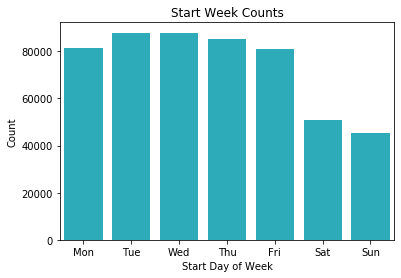

In [33]:
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
df_new['start_week'] = df_new['start_week'].astype(week_category)
base_color = sb.color_palette()[9]
sb.countplot(data=df_new, x='start_week', color=base_color);
plt.xlabel('Start Day of Week');
plt.ylabel('Count');
plt.title('Start Week Counts');

- We can see that less number of trips are taken on Weekends with respect to Weekdays.

> Now, I will look at the start hour of the Bike Trips.

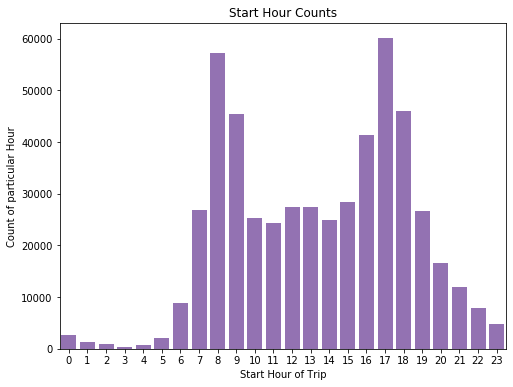

In [34]:
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
base_color = sb.color_palette()[4]

sb.countplot(data=df_new, x='start_hour',ax=ax, color=base_color);
plt.xlabel('Start Hour of Trip');
plt.ylabel('Count of particular Hour');
plt.title('Start Hour Counts');

- We observe that most number of trips are taken around 8-9 am and around 4-6 pm in the evening.

> Now, lets see the months in which trips are taken.

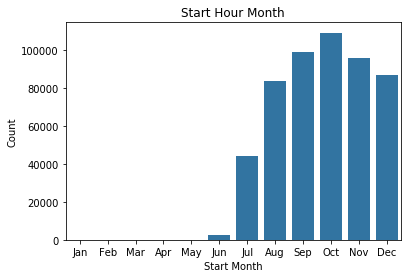

In [36]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df_new['start_month'] = df_new['start_month'].astype(month_category)
base_color = sb.color_palette()[0]
sb.countplot(data=df_new, x='start_month', color=base_color);
plt.xlabel('Start Month');
plt.ylabel('Count');
plt.title('Start Hour Month');

During September, October and November, most of the trips are taken.

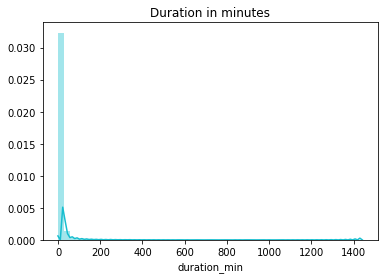

In [38]:
base_color = sb.color_palette()[9]
sb.distplot(df_new['duration_min'],color=base_color);
plt.title('Duration in minutes');

- We will have to change the scale, as the plot is not evenly distributed for visualization.

In [108]:
df_new['duration_min'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

> Now, we will plot it according to the standard deviation with the help of numpy and distribute it by binsizes.

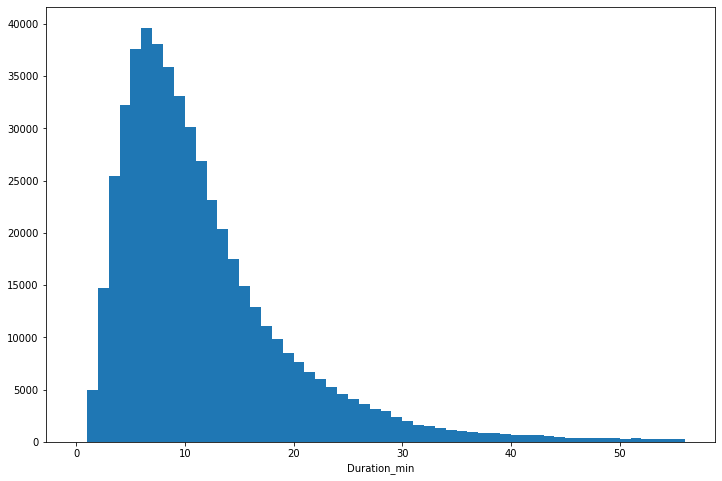

In [41]:
binsize = 1
bins = np.arange(0, 57, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_new, x = 'duration_min', bins = bins)
plt.xlabel('Duration_min')
plt.show()


- We observe that most of trips have a duration of around 10 minutes.

> ### Distribution(s) of your variable(s) of interest. 
- While analyzing the duration time, we had to change the scale to fit our distribution. The other distributions fit well with the plots.

> ###  Unusual distributions of the features and operations performed on the data to tidy, adjust, or change the form of the data.
- I cleaned the features of the dataset for better visualization. For, extracting week, hour, time from the given Start_time, I changed its datatype. For, better visualization, I changed the duration in seconds to duration in minutes. I also dropped some of the columns which were not in use.

## Bivariate Exploration

Now, I'll look at the relation between two features.

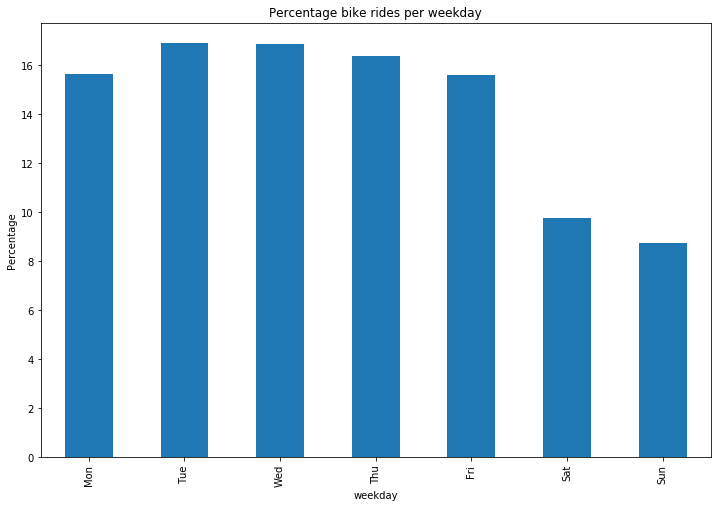

In [110]:
weekday_trips = df_new.groupby('start_week').agg({'bike_id':'count'})
weekday_trips['perc'] = (weekday_trips['bike_id']/weekday_trips['bike_id'].sum())*100
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_trips.reindex(weekday_index)['perc'].plot(kind='bar', figsize=(12,8))
plt.title('Percentage bike rides per weekday')
plt.xlabel('weekday')
plt.ylabel('Percentage');


- Percentage of bike rides are more during weekdays and less on weekends.

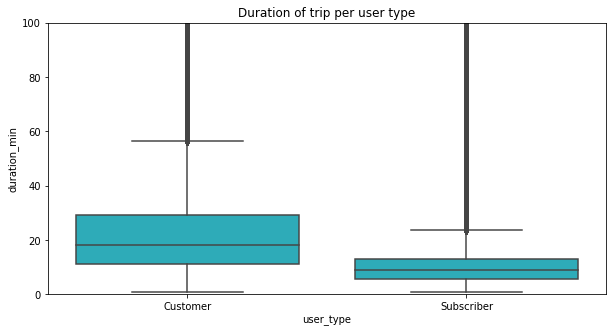

In [42]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]

# left plot: violin plot
#plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = df_new, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim(0,100)
plt.title('Duration of trip per user type');

# right plot: box plot


- Customers take trips often as compared to subscribers

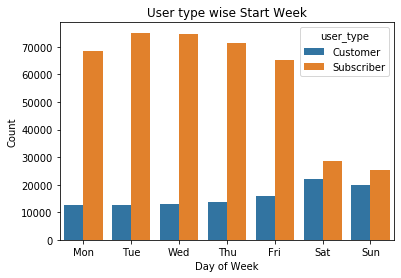

In [43]:
sb.countplot(data=df_new, x='start_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('User type wise Start Week');

- It is found that customers usually go on trips during weekends with respect to weekdays.

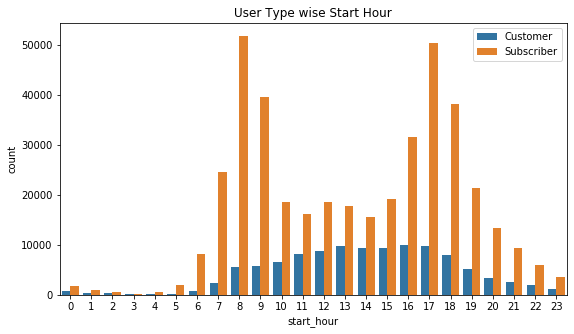

In [44]:
plt.figure(figsize = [20, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'start_hour', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Hour');



- Subscribers take trips mostly during 8-9 am and 4-6 pm which is usually working hours of a company.

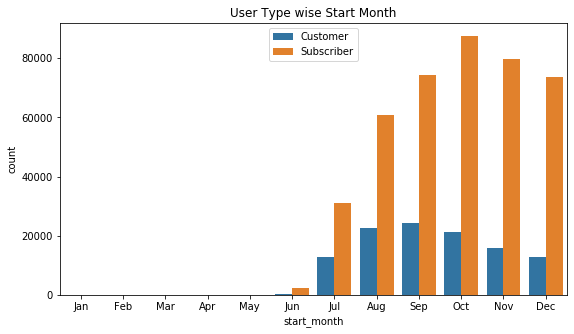

In [45]:
plt.figure(figsize = [20, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'start_month', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Month');



- Both customers and subscribers prefer taking trips during September to December and Most of the trips are  taken in October.

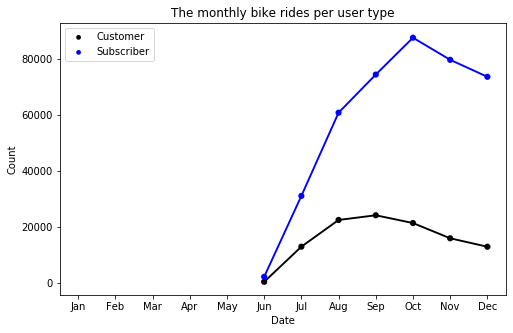

In [115]:
user_type_count = df_new.groupby(["start_month", "user_type"]).size().reset_index()
plt.figure(figsize=(8,5))
color = {'Subscriber':'blue', 'Customer':'black'}
axis = sb.pointplot(x='start_month', y=0, hue='user_type', palette=color, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend();

- Subscribers take more trips as they are working people.

### Relationships you observed in this part of the investigation, Feature(s) of interest vary with other features in the dataset.

There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer.

### Relationships between the other features (not the main feature(s) of interest).

October had the most bike riding usage for subscribers throughout the year.

## Multivariate Exploration

<Figure size 432x288 with 0 Axes>

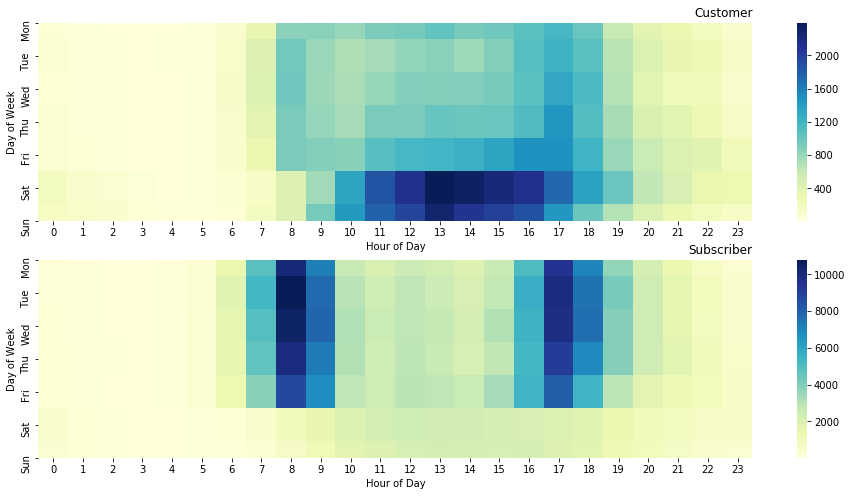

In [116]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
#fig, ax = plt.subplots(figsize=(5,5)) 

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');



- By the above heat map, we can see clearly the trips taken by customers and subscribers on weekdays and weekends.

### Relationships you observed in this part of the investigation, Feature(s) of interest vary with other features in the dataset.

The relationship between the multiple variables plotted are visualized altogether and information are presented. The short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday,which is for for work. The customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose mostly.

### Relationships between the other features (not the main feature(s) of interest).

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed.